In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("C:\\Users\\Lenovo\\Downloads\\DeepL\\Churn_Modelling.csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True) #Converted in one hot encode

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X=data.drop(columns=['Exited'])
y=data['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model= Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.7970 - val_loss: 0.4549 - val_accuracy: 0.8075
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8092 - val_loss: 0.4376 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8202 - val_loss: 0.4310 - val_accuracy: 0.8125
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8231 - val_loss: 0.4249 - val_accuracy: 0.8188
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8258 - val_loss: 0.4194 - val_accuracy: 0.8194
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8289 - val_loss: 0.4134 - val_accuracy: 0.8219
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8319 - val_loss: 0.4062 - val_accuracy: 0.8263

In [25]:
model.layers[1].get_weights()

[array([[ 0.14369169, -1.0834104 , -1.3258289 , -0.11950558,  0.3645183 ,
         -0.6966299 ,  0.28341702, -0.320371  ,  0.33607727,  0.05066352,
         -0.4422384 ],
        [-0.10432567,  0.7623814 , -1.038163  , -0.01596793, -0.03837988,
          0.56614524, -0.83048445, -0.10817881, -0.03003138,  0.17954522,
         -0.41453412],
        [ 0.11656285,  0.64194417, -0.20910656, -0.34640577, -0.533034  ,
          0.48336616,  0.23648693,  0.2929399 ,  0.4001351 ,  0.06913622,
          0.15203725],
        [ 0.31346673,  0.2726439 ,  0.18717375, -0.03463403, -0.19020708,
         -0.24055369,  0.5566735 ,  0.19401307, -0.11675715,  0.7118815 ,
          0.15280199],
        [ 0.40287992, -0.7454496 ,  0.62677026,  0.59744275, -0.16886821,
         -0.33716506, -0.28101712,  0.3314722 ,  0.32992485,  0.33056912,
         -0.38060513],
        [-1.1194255 , -0.62426996, -0.06008757, -0.5119333 , -0.52091783,
          0.03786951, -0.6734631 , -0.66684   ,  0.93941873, -0.6806588

In [26]:
y_log= model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [27]:
y_pred= np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'loss': [0.49704161286354065,
  0.44302549958229065,
  0.4293839633464813,
  0.42205432057380676,
  0.4160609841346741,
  0.4101605713367462,
  0.4036901891231537,
  0.39630576968193054,
  0.3888322412967682,
  0.3812508285045624,
  0.3749295175075531,
  0.3684200644493103,
  0.3617398738861084,
  0.3556130528450012,
  0.35053759813308716,
  0.3470524251461029,
  0.34489932656288147,
  0.34231454133987427,
  0.3412729501724243,
  0.3404209017753601,
  0.3388088345527649,
  0.33804553747177124,
  0.3371970057487488,
  0.3365298807621002,
  0.3360159695148468,
  0.335453599691391,
  0.3349410891532898,
  0.3346865177154541,
  0.33426016569137573,
  0.3336906433105469,
  0.33340194821357727,
  0.3331632912158966,
  0.3330806493759155,
  0.33311131596565247,
  0.33236539363861084,
  0.3318830728530884,
  0.3320879340171814,
  0.3314627408981323,
  0.3311973810195923,
  0.3312318027019501,
  0.3308700621128082,
  0.33087357878685,
  0.3300022482872009,
  0.33005908131599426,
  0.3300691545

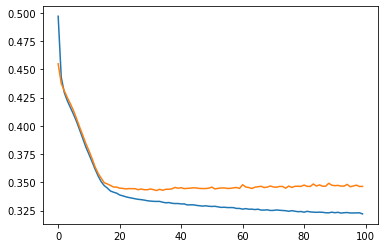

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

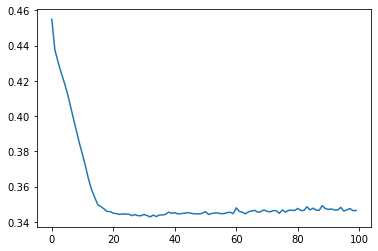

In [32]:
plt.plot(history.history['val_loss'])